<a href="https://colab.research.google.com/github/sunshineluyao/ESG_TwoSources/blob/main/Regression/ESG_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install pingouin

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/ESG_TwoSources/main/Regression/Panel_Data_for_Regression.csv')
df.head()

,Month,Ticker,Company_name,Stock_exchange,Industry,SIC_Code,SIC_2,GDWL,Intang_Other,Intang_Ratio,Num_Analyst,BMR,HML,Mom,SMB,Sale,Total_Industry_Sale,MktShare,Cash_STI,Asset,ROA,Cash_Dividend,Net_Income,LTDebt,STDebt,Inst_Owner,COGS,INVT,Invt_Turn,Industry_Adjusted_InvTurn,R_D,SGA,Cash,Share_Outstanding,Price_Close,Size,IdioRisk,ESG_Rating,ESG_Score,Monthly_Return
0,1,WRLD,World Acceptance Corp,NASDAQ,Finance,6141,61,7.034,15.340,0.026169,4,-0.141200,-6.27,5.43,-3.08,544.543,90719.806,0.006002,9.335,854.988,0.084239,0.000,37.235,251.940,0.000,0.911848,428.594,0.000,0.000000,0.000000,0.0,290.397,9.335,9.284,102.26,949.38184,0.134737,B,2.4,0.081015
1,1,NMIH,NMI Holdings Inc,NASDAQ,Finance,6331,63,3.244,0.390,0.002663,13,-0.447263,-6.27,5.43,-3.08,378.771,1595028.460,0.000237,180.202,1364.818,0.108639,0.000,171.957,153.166,0.000,0.974362,132.077,0.000,0.000000,0.000000,0.0,0.000,41.089,68.358,33.18,2268.11844,0.095876,B,2.5,-3.797472
2,1,NWE,NorthWestern Corp,NASDAQ,Utilities,4911,49,357.586,0.000,0.060498,8,0.075134,-6.27,5.43,-3.08,1257.910,405761.071,0.003100,12.070,5910.702,0.032014,115.127,202.120,2253.023,3.855,0.987411,808.137,53.925,14.986314,0.986860,0.0,0.000,5.145,50.452,71.67,3615.89484,0.048562,BB,4.0,7.395005
3,1,TTMI,TTM Technologies Inc,NASDAQ,Technology,3672,36,774.791,332.008,0.310817,8,0.409873,-6.27,5.43,-3.08,2689.308,614081.750,0.004379,400.154,3560.933,0.055641,0.000,41.301,1242.479,258.153,1.104333,2116.229,122.019,17.343438,3.829659,0.0,215.902,400.154,105.510,15.05,1587.92550,0.084532,BBB,4.3,-4.385382
4,1,WYNN,Wynn Resorts Ltd,NASDAQ,Consumer Services,7999,79,0.000,146.414,0.010555,18,0.255493,-6.27,5.43,-3.08,6611.099,28340.551,0.233273,2351.904,13871.281,0.031831,0.000,122.985,10256.924,342.933,0.733593,4067.053,88.519,45.945537,0.383312,0.0,1006.864,2351.904,107.364,138.87,14909.63868,0.098147,CCC,0.6,-9.152436


In [4]:

df.columns

Index(['Month', 'Ticker', 'Company_name', 'Stock_exchange', 'Industry',
       'SIC_Code', 'SIC_2', 'GDWL', 'Intang_Other', 'Intang_Ratio',
       'Num_Analyst', 'BMR', 'HML', 'Mom', 'SMB', 'Sale',
       'Total_Industry_Sale', 'MktShare', 'Cash_STI', 'Asset', 'ROA',
       'Cash_Dividend', 'Net_Income', 'LTDebt', 'STDebt', 'Inst_Owner', 'COGS',
       'INVT', 'Invt_Turn', 'Industry_Adjusted_InvTurn', 'R_D', 'SGA', 'Cash',
       'Share_Outstanding', 'Price_Close', 'Size', 'IdioRisk', 'ESG_Rating',
       'ESG_Score', 'Monthly_Return'],
      dtype='object')

In [5]:

# install the software
import pingouin as pg

In [6]:

#install the package
import seaborn as sns

# Linear Regression

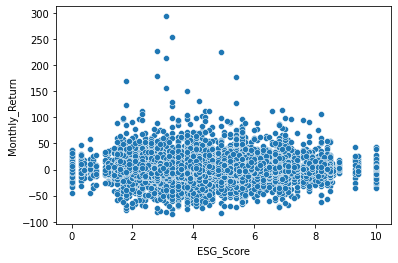

In [7]:
x='ESG_Score'
y='Monthly_Return'
sns.scatterplot(data=df, x=x, y=y)

In [8]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
# define the dependent and independent variables
df=df[['Monthly_Return','ESG_Score','GDWL', 'Intang_Other', 'Intang_Ratio','Num_Analyst', 'BMR', 'HML', 'Mom', 'SMB', 'Sale','Total_Industry_Sale', 'MktShare', 'Cash_STI', 'Asset', 'ROA','Cash_Dividend', 'Net_Income', 'LTDebt', 'STDebt', 'Inst_Owner', 'COGS','INVT', 'Invt_Turn', 'Industry_Adjusted_InvTurn', 'R_D', 'SGA', 'Cash','Share_Outstanding', 'Price_Close', 'Size', 'IdioRisk']]
df = df.dropna()
df.head()

,Monthly_Return,ESG_Score,GDWL,Intang_Other,Intang_Ratio,Num_Analyst,BMR,HML,Mom,SMB,Sale,Total_Industry_Sale,MktShare,Cash_STI,Asset,ROA,Cash_Dividend,Net_Income,LTDebt,STDebt,Inst_Owner,COGS,INVT,Invt_Turn,Industry_Adjusted_InvTurn,R_D,SGA,Cash,Share_Outstanding,Price_Close,Size,IdioRisk
0,0.081015,2.4,7.034,15.340,0.026169,4,-0.141200,-6.27,5.43,-3.08,544.543,90719.806,0.006002,9.335,854.988,0.084239,0.000,37.235,251.940,0.000,0.911848,428.594,0.000,0.000000,0.000000,0.0,290.397,9.335,9.284,102.26,949.38184,0.134737
1,-3.797472,2.5,3.244,0.390,0.002663,13,-0.447263,-6.27,5.43,-3.08,378.771,1595028.460,0.000237,180.202,1364.818,0.108639,0.000,171.957,153.166,0.000,0.974362,132.077,0.000,0.000000,0.000000,0.0,0.000,41.089,68.358,33.18,2268.11844,0.095876
2,7.395005,4.0,357.586,0.000,0.060498,8,0.075134,-6.27,5.43,-3.08,1257.910,405761.071,0.003100,12.070,5910.702,0.032014,115.127,202.120,2253.023,3.855,0.987411,808.137,53.925,14.986314,0.986860,0.0,0.000,5.145,50.452,71.67,3615.89484,0.048562
3,-4.385382,4.3,774.791,332.008,0.310817,8,0.409873,-6.27,5.43,-3.08,2689.308,614081.750,0.004379,400.154,3560.933,0.055641,0.000,41.301,1242.479,258.153,1.104333,2116.229,122.019,17.343438,3.829659,0.0,215.902,400.154,105.510,15.05,1587.92550,0.084532
4,-9.152436,0.6,0.000,146.414,0.010555,18,0.255493,-6.27,5.43,-3.08,6611.099,28340.551,0.233273,2351.904,13871.281,0.031831,0.000,122.985,10256.924,342.933,0.733593,4067.053,88.519,45.945537,0.383312,0.0,1006.864,2351.904,107.364,138.87,14909.63868,0.098147


In [10]:
X =df[['ESG_Score','GDWL', 'Intang_Other', 'Intang_Ratio','Num_Analyst', 'BMR', 'HML', 'Mom', 'SMB', 'Sale','Total_Industry_Sale', 'MktShare', 'Cash_STI', 'Asset', 'ROA','Cash_Dividend', 'Net_Income', 'LTDebt', 'STDebt', 'Inst_Owner', 'COGS','INVT', 'Invt_Turn', 'Industry_Adjusted_InvTurn', 'R_D', 'SGA', 'Cash','Share_Outstanding', 'Price_Close', 'Size', 'IdioRisk']]
y=df['Monthly_Return']

In [11]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,ESG_Score,GDWL,Intang_Other,Intang_Ratio,Num_Analyst,BMR,HML,Mom,SMB,Sale,Total_Industry_Sale,MktShare,Cash_STI,Asset,ROA,Cash_Dividend,Net_Income,LTDebt,STDebt,Inst_Owner,COGS,INVT,Invt_Turn,Industry_Adjusted_InvTurn,R_D,SGA,Cash,Share_Outstanding,Price_Close,Size,IdioRisk
0,1.0,2.4,7.034,15.340,0.026169,4,-0.141200,-6.27,5.43,-3.08,544.543,90719.806,0.006002,9.335,854.988,0.084239,0.000,37.235,251.940,0.000,0.911848,428.594,0.000,0.000000,0.000000,0.0,290.397,9.335,9.284,102.26,949.38184,0.134737
1,1.0,2.5,3.244,0.390,0.002663,13,-0.447263,-6.27,5.43,-3.08,378.771,1595028.460,0.000237,180.202,1364.818,0.108639,0.000,171.957,153.166,0.000,0.974362,132.077,0.000,0.000000,0.000000,0.0,0.000,41.089,68.358,33.18,2268.11844,0.095876
2,1.0,4.0,357.586,0.000,0.060498,8,0.075134,-6.27,5.43,-3.08,1257.910,405761.071,0.003100,12.070,5910.702,0.032014,115.127,202.120,2253.023,3.855,0.987411,808.137,53.925,14.986314,0.986860,0.0,0.000,5.145,50.452,71.67,3615.89484,0.048562
3,1.0,4.3,774.791,332.008,0.310817,8,0.409873,-6.27,5.43,-3.08,2689.308,614081.750,0.004379,400.154,3560.933,0.055641,0.000,41.301,1242.479,258.153,1.104333,2116.229,122.019,17.343438,3.829659,0.0,215.902,400.154,105.510,15.05,1587.92550,0.084532
4,1.0,0.6,0.000,146.414,0.010555,18,0.255493,-6.27,5.43,-3.08,6611.099,28340.551,0.233273,2351.904,13871.281,0.031831,0.000,122.985,10256.924,342.933,0.733593,4067.053,88.519,45.945537,0.383312,0.0,1006.864,2351.904,107.364,138.87,14909.63868,0.098147


In [12]:
# conduct regression
model = sm.OLS(y, X).fit()

In [13]:
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Monthly_Return   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     171.6
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        05:34:05   Log-Likelihood:                -66179.
No. Observations:               15846   AIC:                         1.324e+05
Df Residuals:                   15814   BIC:                         1.327e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [14]:
### get the residuals
predictions = model.predict(X)
residuals =y-predictions
df_res=pd.DataFrame({'Residual': residuals, 'Prediction': predictions})
df_res.head()

,Residual,Prediction
0,4.143064,-4.062050
1,2.241975,-6.039447
2,13.645828,-6.250823
3,-1.132964,-3.252418
4,-5.276841,-3.875595


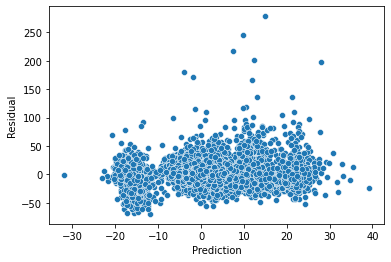

In [15]:

#print the scatter plot between residuals and predicitions
x='Prediction'
y='Residual'
sns.scatterplot(data=df_res, x=x, y=y)

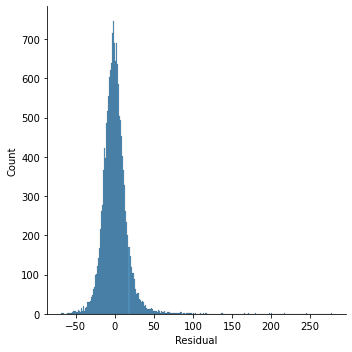

In [16]:
# histogram of the residual
sns.displot(df_res, x="Residual")

In [17]:
x=df_res['Residual']
pg.normality(x)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
Residual,0.891191,0.0,False


In [18]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [19]:
pearson=pg.pairwise_corr(df,columns=X.columns, method='pearson').round(3)
pearson =pearson[pearson['p-unc']<0.05]
pearson

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,ESG_Score,GDWL,pearson,two-sided,15846,0.067,"[0.05, 0.08]",0.004,0.004,0.067,0.000,1.768e+13,1.000
2,ESG_Score,Intang_Ratio,pearson,two-sided,15846,0.132,"[0.12, 0.15]",0.018,0.017,0.133,0.000,6.608e+58,1.000
3,ESG_Score,Num_Analyst,pearson,two-sided,15846,0.226,"[0.21, 0.24]",0.051,0.051,0.230,0.000,3.221e+178,1.000
4,ESG_Score,BMR,pearson,two-sided,15846,-0.106,"[-0.12, -0.09]",0.011,0.011,-0.107,0.000,1.639e+37,1.000
8,ESG_Score,Sale,pearson,two-sided,15846,0.076,"[0.06, 0.09]",0.006,0.006,0.076,0.000,9.044e+17,1.000
9,ESG_Score,Total_Industry_Sale,pearson,two-sided,15846,-0.018,"[-0.03, -0.0]",0.000,0.000,-0.018,0.020,0.146,0.640
10,ESG_Score,MktShare,pearson,two-sided,15846,0.120,"[0.1, 0.13]",0.014,0.014,0.120,0.000,3.073e+47,1.000
13,ESG_Score,ROA,pearson,two-sided,15846,0.076,"[0.06, 0.09]",0.006,0.006,0.077,0.000,1.309e+18,1.000
14,ESG_Score,Cash_Dividend,pearson,two-sided,15846,0.111,"[0.1, 0.13]",0.012,0.012,0.112,0.000,7.287e+40,1.000
15,ESG_Score,Net_Income,pearson,two-sided,15846,0.082,"[0.07, 0.1]",0.007,0.007,0.082,0.000,1.098e+21,1.000


In [24]:
X0 =df[['GDWL', 'Intang_Other', 'Intang_Ratio','Num_Analyst', 'BMR', 'HML', 'Mom', 'SMB', 'Sale','Total_Industry_Sale', 'MktShare', 'Cash_STI', 'Asset', 'ROA','Cash_Dividend', 'Net_Income', 'LTDebt', 'STDebt', 'Inst_Owner', 'COGS','INVT', 'Invt_Turn', 'Industry_Adjusted_InvTurn', 'R_D', 'SGA', 'Cash','Share_Outstanding', 'Price_Close', 'Size', 'IdioRisk']]
y=df['Monthly_Return']

In [25]:
# add a constant to the dependent variables
X0= sm.add_constant(X0)
X0.head()

,const,GDWL,Intang_Other,Intang_Ratio,Num_Analyst,BMR,HML,Mom,SMB,Sale,Total_Industry_Sale,MktShare,Cash_STI,Asset,ROA,Cash_Dividend,Net_Income,LTDebt,STDebt,Inst_Owner,COGS,INVT,Invt_Turn,Industry_Adjusted_InvTurn,R_D,SGA,Cash,Share_Outstanding,Price_Close,Size,IdioRisk
0,1.0,7.034,15.340,0.026169,4,-0.141200,-6.27,5.43,-3.08,544.543,90719.806,0.006002,9.335,854.988,0.084239,0.000,37.235,251.940,0.000,0.911848,428.594,0.000,0.000000,0.000000,0.0,290.397,9.335,9.284,102.26,949.38184,0.134737
1,1.0,3.244,0.390,0.002663,13,-0.447263,-6.27,5.43,-3.08,378.771,1595028.460,0.000237,180.202,1364.818,0.108639,0.000,171.957,153.166,0.000,0.974362,132.077,0.000,0.000000,0.000000,0.0,0.000,41.089,68.358,33.18,2268.11844,0.095876
2,1.0,357.586,0.000,0.060498,8,0.075134,-6.27,5.43,-3.08,1257.910,405761.071,0.003100,12.070,5910.702,0.032014,115.127,202.120,2253.023,3.855,0.987411,808.137,53.925,14.986314,0.986860,0.0,0.000,5.145,50.452,71.67,3615.89484,0.048562
3,1.0,774.791,332.008,0.310817,8,0.409873,-6.27,5.43,-3.08,2689.308,614081.750,0.004379,400.154,3560.933,0.055641,0.000,41.301,1242.479,258.153,1.104333,2116.229,122.019,17.343438,3.829659,0.0,215.902,400.154,105.510,15.05,1587.92550,0.084532
4,1.0,0.000,146.414,0.010555,18,0.255493,-6.27,5.43,-3.08,6611.099,28340.551,0.233273,2351.904,13871.281,0.031831,0.000,122.985,10256.924,342.933,0.733593,4067.053,88.519,45.945537,0.383312,0.0,1006.864,2351.904,107.364,138.87,14909.63868,0.098147


In [26]:
# conduct regression
model = sm.OLS(y, X0).fit()

In [27]:
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Monthly_Return   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     177.1
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        05:34:33   Log-Likelihood:                -66182.
No. Observations:               15846   AIC:                         1.324e+05
Df Residuals:                   15815   BIC:                         1.327e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# Decision Tree

In [40]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
clf = DecisionTreeClassifier()

In [41]:
df['Monthly_Return_Rank']=pd.qcut(df.Monthly_Return,2,labels=np.arange(1,3,1))
df.head()

,Monthly_Return,ESG_Score,GDWL,Intang_Other,Intang_Ratio,Num_Analyst,BMR,HML,Mom,SMB,Sale,Total_Industry_Sale,MktShare,Cash_STI,Asset,ROA,Cash_Dividend,Net_Income,LTDebt,STDebt,Inst_Owner,COGS,INVT,Invt_Turn,Industry_Adjusted_InvTurn,R_D,SGA,Cash,Share_Outstanding,Price_Close,Size,IdioRisk,Monthly_Return_Rank
0,0.081015,2.4,7.034,15.340,0.026169,4,-0.141200,-6.27,5.43,-3.08,544.543,90719.806,0.006002,9.335,854.988,0.084239,0.000,37.235,251.940,0.000,0.911848,428.594,0.000,0.000000,0.000000,0.0,290.397,9.335,9.284,102.26,949.38184,0.134737,1
1,-3.797472,2.5,3.244,0.390,0.002663,13,-0.447263,-6.27,5.43,-3.08,378.771,1595028.460,0.000237,180.202,1364.818,0.108639,0.000,171.957,153.166,0.000,0.974362,132.077,0.000,0.000000,0.000000,0.0,0.000,41.089,68.358,33.18,2268.11844,0.095876,1
2,7.395005,4.0,357.586,0.000,0.060498,8,0.075134,-6.27,5.43,-3.08,1257.910,405761.071,0.003100,12.070,5910.702,0.032014,115.127,202.120,2253.023,3.855,0.987411,808.137,53.925,14.986314,0.986860,0.0,0.000,5.145,50.452,71.67,3615.89484,0.048562,2
3,-4.385382,4.3,774.791,332.008,0.310817,8,0.409873,-6.27,5.43,-3.08,2689.308,614081.750,0.004379,400.154,3560.933,0.055641,0.000,41.301,1242.479,258.153,1.104333,2116.229,122.019,17.343438,3.829659,0.0,215.902,400.154,105.510,15.05,1587.92550,0.084532,1
4,-9.152436,0.6,0.000,146.414,0.010555,18,0.255493,-6.27,5.43,-3.08,6611.099,28340.551,0.233273,2351.904,13871.281,0.031831,0.000,122.985,10256.924,342.933,0.733593,4067.053,88.519,45.945537,0.383312,0.0,1006.864,2351.904,107.364,138.87,14909.63868,0.098147,1


In [42]:
df['Monthly_Return_Rank']=df['Monthly_Return_Rank'].apply(lambda x: 'High' if x==2 else 'Low')

In [43]:
feature_names=['ESG_Score']
features=df[feature_names]
targets=df['Monthly_Return_Rank']
targets_names = targets.unique()

In [44]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.3, random_state=42)

In [45]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [46]:
#####Optimizing Decision Tree Performance
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2,random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(train_features,train_targets)

#Predict the response for test dataset
y_pred = clf.predict(test_features)

# Compute test set accuracy  
acc = accuracy_score(y_pred, test_targets)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.51


In [47]:

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


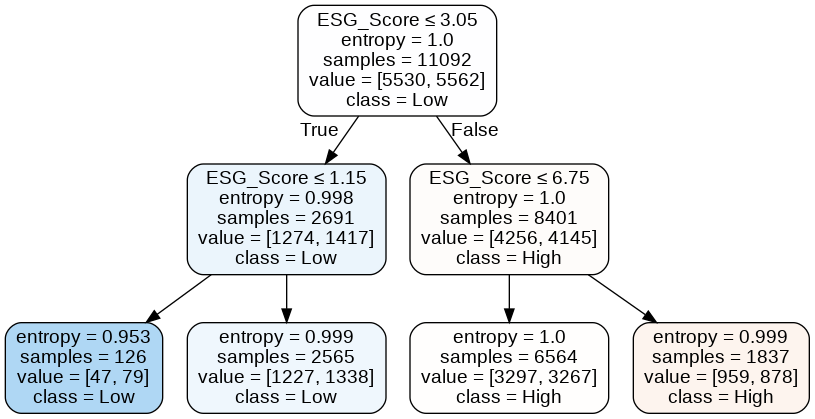

In [48]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=clf.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ESG.png')
Image(graph.create_png())

# Random Forest and Feature Importance 
https://mljar.com/blog/feature-importance-in-random-forest/

In [49]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt



plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [50]:
feature_names=X.columns
features=X
targets=df['Monthly_Return']
targets_names = targets.unique()

In [51]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.3, random_state=42)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_features)
train_features = scaler.transform(train_features)

In [60]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(train_features,train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [54]:
rf.score(train_features,train_targets)

0.9309041610686559

In [61]:
rf.feature_importances_

array([0.        , 0.01634685, 0.01072496, 0.01287461, 0.01813571,
       0.01324037, 0.06947247, 0.06822036, 0.27558732, 0.10215566,
       0.01069946, 0.02863004, 0.01409754, 0.03082582, 0.01076893,
       0.02388904, 0.00260183, 0.02848013, 0.0183362 , 0.01448399,
       0.02565762, 0.01236825, 0.01074177, 0.01579036, 0.01140378,
       0.00495755, 0.01202466, 0.01299805, 0.01305519, 0.04529697,
       0.01986813, 0.04626638])

Text(0.5, 0, 'Random Forest Feature Importance')

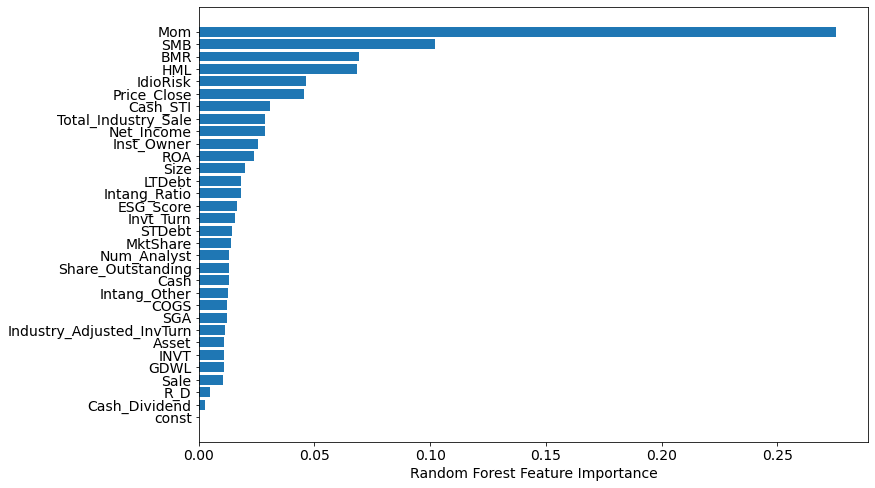

In [62]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [63]:
perm_importance = permutation_importance(rf, test_features,test_targets)

Text(0.5, 0, 'Permutation Importance')

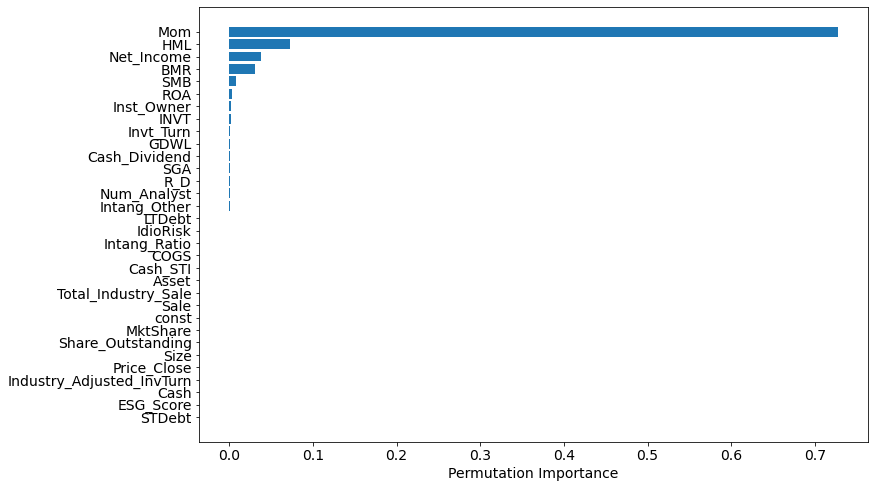

In [64]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [65]:
pip install shap

     |████████████████████████████████| 358kB 10.9MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=489402 sha256=896eda2c27279418dcfd00c3f71126fe6efd9e6ad3982f5b23a959a13a7a0a95
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


In [66]:
import shap

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(test_features)

In [ ]:
shap.summary_plot(shap_values, test_features, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values, test_features)